<h2><center>ASSIGNMENT 4</center></h2>
<h2><center>DEEP ASHISH JARIWALA, JAYDEEP SINGH</center></h2>
<h2><center>GROUP - 41</center></h2>
<h2><center>Q: CM2</center></h2>

<p>All the necessary code blocks used to achieve the best resulting fully connected DNN for this classification problem.</p>
<ul>
    <li>SELECTING BEST ARCHITECTURE</li>
    <li>SELECTING BEST ACTIVATION FUNCTION</li>
    <li>SELECTING BEST OPTIMIZATION</li>
    <li>SELECTING BEST LEARNING RATE AND DROP OUT</li>
</ul>

# CODE BLOCKS TO GET BEST ARCHITECTURE FOR OUR MODEL

### PREPARATION OF DATASET

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

from numpy.random import seed
seed(20)
tf.random.set_seed(13)

In [99]:
dataset = pd.read_csv("COVID_dataset_train.csv")

In [100]:
# replacing NaN in Outbreak_Related with NO 
dataset['Outbreak_Related'] = dataset['Outbreak_Related'].fillna("No") 

# Dropping NaN values in Age_Group, Test_reported_date and specimen_date
dataset = dataset.dropna()

In [101]:
dataset.Accurate_Episode_Date = pd.to_datetime(dataset.Accurate_Episode_Date)
dataset.Case_Reported_Date = pd.to_datetime(dataset.Case_Reported_Date)
dataset.Test_Reported_Date = pd.to_datetime(dataset.Test_Reported_Date)
dataset.Specimen_Date = pd.to_datetime(dataset.Specimen_Date)

dataset = dataset.drop(['Test_Reported_Date', 'Specimen_Date'],axis=1)

In [102]:
dataset.Case_Reported_Date = list(map(lambda x: x.timestamp(),dataset.Case_Reported_Date))
dataset.Accurate_Episode_Date = list(map(lambda x: x.timestamp(),dataset.Accurate_Episode_Date))

In [103]:
## encoding of target variable
dataset_target = dataset['Outcome1']
dataset_target = pd.DataFrame(dataset_target, columns = ['Outcome1'])

categorical_cols = ['Outcome1']

# Create the encoder.
encoder_1 = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False)

# Fit and transform encoder to X
array_hot_encoded_1 = encoder_1.fit_transform(dataset_target)

# convert it to a Data Frame
data_hot_encoded_1 = pd.DataFrame(array_hot_encoded_1, index=dataset_target.index)

# set column names of encoded dataframe
data_hot_encoded_1.columns = encoder_1.get_feature_names(categorical_cols)

dataset_target_1 = data_hot_encoded_1

In [104]:
## encoding of features
dataset_features = dataset.drop(['Outcome1'], axis = 1)

dataset_features['Age_Group'] = dataset_features['Age_Group'].replace({'<20': 1, '20s': 2, '30s': 3 , '40s': 4, '50s': 5, '60s': 6, '70s': 7, '80s': 8, '90s': 9})

categorical_cols = ['Client_Gender','Case_AcquisitionInfo','Reporting_PHU_City','Outbreak_Related']

# Create the encoder.
encoder = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False)

# Fit and transform encoder to X
array_hot_encoded = encoder.fit_transform(dataset_features[categorical_cols])

# convert it to a Data Frame
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=dataset.index)

# set column names of encoded dataframe
data_hot_encoded.columns = encoder.get_feature_names(categorical_cols)

# concatenate other columns with the encoded columns to get the final datset
data_other_cols = dataset_features.drop(columns=categorical_cols)
dataset_temp = pd.concat([data_hot_encoded, data_other_cols], axis=1)
dataset_features = dataset_temp

In [105]:
X_train, X_test, y_train, y_test = train_test_split(dataset_features, dataset_target_1, test_size = 0.10, random_state = 360)

In [106]:
# X_train = dataset_features
# y_train = dataset_target_1

In [107]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Reporting_PHU_Longitude', 'Reporting_PHU_Latitude','Case_Reported_Date', 'Accurate_Episode_Date']

sc = StandardScaler()

X_train_scaled = X_train.copy()


X_train_scaled[numeric_columns] = sc.fit_transform(X_train[numeric_columns])


In [108]:
X_test_scaled = X_test.copy()
X_test_scaled[numeric_columns] = sc.transform(X_test[numeric_columns])

## MODEL 1

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

# INITIALING ANN
ann = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units = 112, activation='relu'))
ann.add(Dropout(0.05))

# ADDING SECOND HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units=448, activation='relu', kernel_regularizer=l2(0.001)))

# ADDING THIRD HIDDEN LAYER
ann.add(tf.keras.layers.Dense(units=56, activation='relu'))

# ADDING OUTPUT LAYER
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model = ann.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.8213 - val_loss: 0.4183 - val_accuracy: 0.8706
Epoch 2/400
351/351 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8782 - val_loss: 0.3532 - val_accuracy: 0.8938
Epoch 3/400
351/351 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8871 - val_loss: 0.3303 - val_accuracy: 0.8928
Epoch 4/400
351/351 [==============================] - 0s 1ms/step - loss: 0.32

In [111]:
ann.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 112)               5824      
_________________________________________________________________
dropout_26 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 448)               50624     
_________________________________________________________________
dense_64 (Dense)             (None, 56)                25144     
_________________________________________________________________
dense_65 (Dense)             (None, 3)                 171       
Total params: 81,763
Trainable params: 81,763
Non-trainable params: 0
_________________________________________________________________


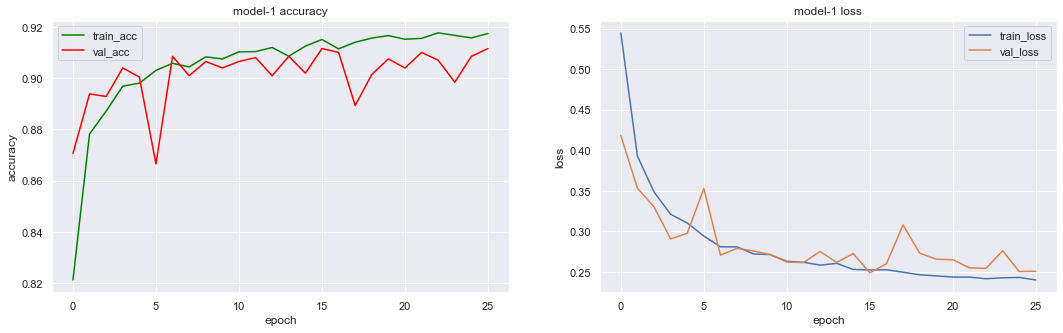

In [112]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model.history['loss'], label = 'train_loss')
plt.plot(fitted_model.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [113]:
print("Mean val acc:", np.mean(fitted_model.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model.history['loss']))

Mean val acc: 0.9012600114712348
Mean val loss: 0.2839101558694473
Mean train acc: 0.9051691614664518
Mean train loss: 0.2813888421425453


In [114]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train = ann.predict(X_test_scaled)

pred_values_train= []
for result in results_train:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, pred_values_train)

0.9058020477815699

## MODEL 2

In [115]:
# INITIALING ANN
ann_2 = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units = 112, activation='relu'))
ann_2.add(Dropout(0.15))

# ADDING SECOND HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units=1120, activation='relu', kernel_regularizer=l2(0.001)))
ann_2.add(Dropout(0.15))

# ADDING THIRD HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units=1120, activation='relu', kernel_regularizer=l2(0.001)))

# ADDING FOURTH HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units=448, activation='relu'))
ann_2.add(Dropout(0.15))

# ADDING FIFTH HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units=448, activation='relu'))

# ADDING SIXTH HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units=112, activation='relu'))
ann_2.add(Dropout(0.15))

# ADDING SEVENTH HIDDEN LAYER
ann_2.add(tf.keras.layers.Dense(units=56, activation='relu'))

# ADDING OUTPUT LAYER
ann_2.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_2 = ann_2.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 6s 17ms/step - loss: 0.7829 - accuracy: 0.7809 - val_loss: 0.4239 - val_accuracy: 0.8923
Epoch 2/400
351/351 [==============================] - 6s 17ms/step - loss: 0.4524 - accuracy: 0.8619 - val_loss: 0.3587 - val_accuracy: 0.8857
Epoch 3/400
351/351 [==============================] - 6s 17ms/step - loss: 0.3815 - accuracy: 0.8760 - val_loss: 0.3601 - val_accuracy: 0.8751
Epoch 4/400
351/351 [==============================] - 6s 17ms/step - loss: 

In [117]:
ann_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 112)               5824      
_________________________________________________________________
dropout_27 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 1120)              126560    
_________________________________________________________________
dropout_28 (Dropout)         (None, 1120)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 1120)              1255520   
_________________________________________________________________
dense_69 (Dense)             (None, 448)               502208    
_________________________________________________________________
dropout_29 (Dropout)         (None, 448)             

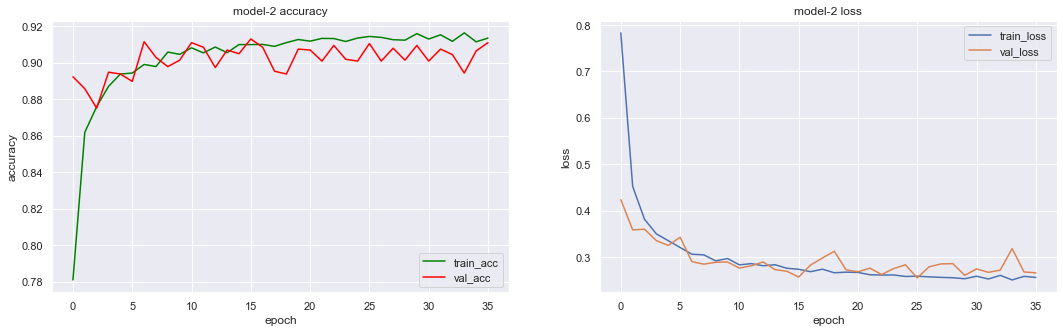

In [118]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_2.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_2.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-2 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_2.history['loss'], label = 'train_loss')
plt.plot(fitted_model_2.history['val_loss'], label = 'val_loss')
plt.title('model-2 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [119]:
print("Mean val acc:", np.mean(fitted_model_2.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_2.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_2.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_2.history['loss']))

Mean val acc: 0.9018790026505789
Mean val loss: 0.29204246153434116
Mean train acc: 0.9029549972878562
Mean train loss: 0.2976659768157535


In [120]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train = ann_2.predict(X_test_scaled)

pred_values_train= []
for result in results_train:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, pred_values_train)

0.9017064846416383

## MODEL 3

In [121]:
# INITIALING ANN
ann_31 = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann_31.add(tf.keras.layers.Dense(units = 448, activation='sigmoid'))

# ADDING SECOND HIDDEN LAYER
ann_31.add(tf.keras.layers.Dense(units=112, activation='sigmoid'))

# ADDING OUTPUT LAYER
ann_31.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann_31.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_31 = ann_31.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.7412 - val_loss: 0.4271 - val_accuracy: 0.8443
Epoch 2/400
351/351 [==============================] - 0s 958us/step - loss: 0.3716 - accuracy: 0.8665 - val_loss: 0.3526 - val_accuracy: 0.8595
Epoch 3/400
351/351 [==============================] - 0s 1ms/step - loss: 0.3129 - accuracy: 0.8872 - val_loss: 0.3035 - val_accuracy: 0.8883
Epoch 4/400
351/351 [==============================] - 0s 1ms/step - loss: 0.

In [123]:
ann_31.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 448)               23296     
_________________________________________________________________
dense_75 (Dense)             (None, 112)               50288     
_________________________________________________________________
dense_76 (Dense)             (None, 3)                 339       
Total params: 73,923
Trainable params: 73,923
Non-trainable params: 0
_________________________________________________________________


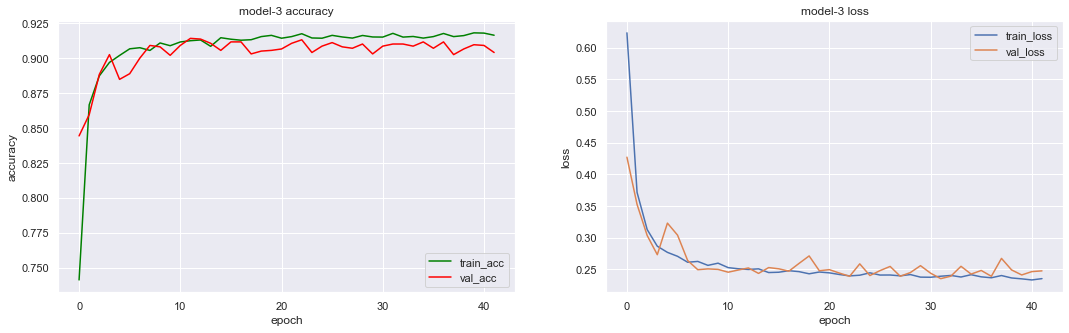

In [124]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_31.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_31.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-3 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_31.history['loss'], label = 'train_loss')
plt.plot(fitted_model_31.history['val_loss'], label = 'val_loss')
plt.title('model-3 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [125]:
print("Mean val acc:", np.mean(fitted_model_31.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_31.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_31.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_31.history['loss']))

Mean val acc: 0.9037026308831715
Mean val loss: 0.26071180119400933
Mean train acc: 0.9073495680377597
Mean train loss: 0.26018670485133216


In [126]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train_31 = ann_31.predict(X_test_scaled)

pred_values_train= []
for result in results_train_31:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, pred_values_train)

0.8976109215017065

## MODEL 4

In [127]:
# INITIALING ANN
ann_4 = tf.keras.models.Sequential()

# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units = 112, activation='relu'))
ann_4.add(Dropout(0.25))

# ADDING SECOND HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=1120, activation='relu'))
ann_4.add(Dropout(0.25))

# ADDING THIRD HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=1120, activation='relu'))

# ADDING FOURTH HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=448, activation='relu'))
ann_4.add(Dropout(0.25))

# ADDING FIFTH HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=448, activation='relu'))

# ADDING SIXTH HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=448, activation='relu'))
ann_4.add(Dropout(0.15))

# ADDING SEVENTH HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=112, activation='relu'))

# ADDING EIGHT HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=112, activation='relu'))
ann_4.add(Dropout(0.15))

# ADDING NINTH HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=56, activation='relu'))

# ADDING TENTH HIDDEN LAYER
ann_4.add(tf.keras.layers.Dense(units=27, activation='relu'))
ann_4.add(Dropout(0.15))

# ADDING OUTPUT LAYER
ann_4.add(tf.keras.layers.Dense(units=3, activation='softmax'))

ann_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [128]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience = 10)

fitted_model_4 = ann_4.fit(X_train_scaled, y_train, validation_split = 0.15, callbacks = [callback], epochs= 400, verbose=1)

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

351/351 [==============================] - 6s 17ms/step - loss: 0.6924 - accuracy: 0.6962 - val_loss: 0.4250 - val_accuracy: 0.8357
Epoch 2/400
351/351 [==============================] - 6s 17ms/step - loss: 0.4662 - accuracy: 0.8372 - val_loss: 0.3449 - val_accuracy: 0.8721
Epoch 3/400
351/351 [==============================] - 6s 17ms/step - loss: 0.3855 - accuracy: 0.8668 - val_loss: 0.2999 - val_accuracy: 0.8928
Epoch 4/400
351/351 [==============================] - 6s 18ms/step - loss: 

In [129]:
ann_4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 112)               5824      
_________________________________________________________________
dropout_31 (Dropout)         (None, 112)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 1120)              126560    
_________________________________________________________________
dropout_32 (Dropout)         (None, 1120)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 1120)              1255520   
_________________________________________________________________
dense_80 (Dense)             (None, 448)               502208    
_________________________________________________________________
dropout_33 (Dropout)         (None, 448)             

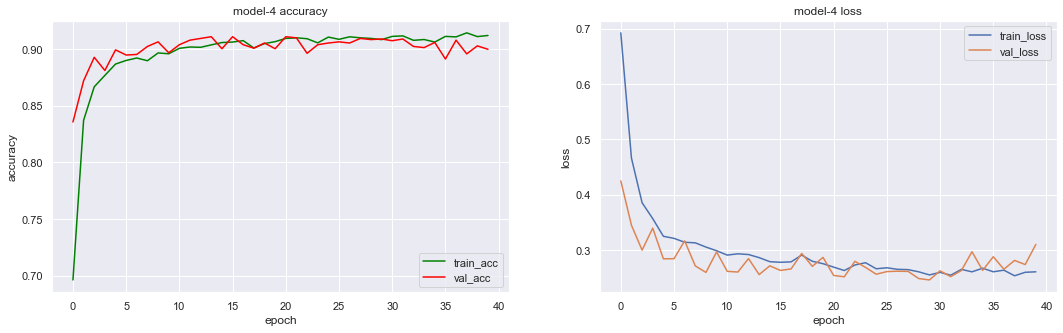

In [130]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_4.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_4.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-4 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_4.history['loss'], label = 'train_loss')
plt.plot(fitted_model_4.history['val_loss'], label = 'val_loss')
plt.title('model-4 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [131]:
print("Mean val acc:", np.mean(fitted_model_4.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_4.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_4.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_4.history['loss']))

Mean val acc: 0.9005434796214103
Mean val loss: 0.27960181012749674
Mean train acc: 0.8966873407363891
Mean train loss: 0.29729943424463273


In [132]:
# FOR TESTING ON TRAINING SET

# check test set accuracy
results_train_4 = ann_4.predict(X_test_scaled)

pred_values_train= []
for result in results_train_4:
    entry = [0,0,0]
    index = result.argmax()
    entry[index] = 1
    pred_values_train.append(entry)
    
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, pred_values_train)

0.8996587030716724

<P>Final comparison of results and run time performance are reported in a tabular form in CM3</P>